<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/DSF_PT03_P2_Multiple_Linear_Regression_part1_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Multiple Linear regression
## Objectives
*   a. use one-hot strategy to encode categorical variables
*   b. conduct linear regression in start models
*   c. use standard scaling for regression for better interprettion
*   d. conduct linear regression in sklearn



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline


#2 Regression with multiple predictors
*   what is multiple predictors



## 2.1 Expanding Simple linear regression

### 2.2 confounding variables
*   The variables are related indirectly
*   with more variable, their correlation with the target may be nearly collinearwith each other.



#3 Dealing with categorical variables
1.  one-hot encoding (sklearn)
2. Dummying


In [ ]:
#checking the datasets available in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
#using diamond dataset
#load the dataset
# x,y,z describe the dimensiond

data = sns.load_dataset("diamonds")
data[0:5]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#check the shape
print("records :", data.shape[0])
print("number of attributes :", data.shape[1])

records : 53940
number of attributes : 10


In [ ]:
#Getting the categorical variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
#concise data summary
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#make a copy of tha data to be used
data2 = data.copy(deep=True)

In [ ]:
#get the columns to encode
data_encode = data2[["cut","color"]]
data_encode.head()


,cut,color
0,Ideal,E
1,Premium,E
2,Good,E
3,Premium,I
4,Good,J


In [ ]:
#check the unique values of the attribute cut
data_encode["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
#check the unique values of the attribute color
data_encode["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
#using one-encoding to create dummy column
ohe = OneHotEncoder(drop='first')
data_enc1= ohe.fit_transform(data_encode)


#converting the finding into dataframe
data_enc1.todense()


#getting feature names
ohe.get_feature_names_out()





array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype=object)

In [ ]:
# geting feature names in a dataframe
data3 = pd.DataFrame(data_enc1.todense(), columns=ohe.get_feature_names_out())
data3.head()


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#Using Dummy

In [ ]:
#create dataframe for get dummies
data_dummy = data.copy(deep=True)


In [ ]:
#the attributes to be used
dummy_df= data_dummy[["cut", "color"]]


In [ ]:
#using get dummies
pd.get_dummies(dummy_df, drop_first=True)

,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
53935,0,0,0,0,0,0,0,0,0,0
53936,0,0,1,0,0,0,0,0,0,0
53937,0,1,0,0,0,0,0,0,0,0
53938,1,0,0,0,0,0,0,1,0,0


#4 Multiple Regression in statsmodels

In [ ]:
#getting the attributes to use the model
data_df2=data.copy(deep=True)
data_df2.drop(["cut", "color", "clarity"], axis=1, inplace=True)
data_df2.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#spliting the dataframe into features and target
#getting x, and y variables
X = data_df2.drop("price", axis=1)
y= data_df2["price"]

In [ ]:
#alternative way
#X,y = data.drop("price", axis=1), data["price"]

In [ ]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [ ]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [ ]:
#creating the model/#OrdinaryLeastSquares
model = sm.OLS(endog=y, exog=X)
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          1.120e+05
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        17:34:10   Log-Likelihood:                     -4.7196e+05
No. Observations:               53940   AIC:                                  9.439e+05
Df Residuals:                   53934   BIC:                                  9.440e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9533.9516     59.317    160.730      0.000    9417.691    9650.213
depth         28.2911      2.416     11.712      0.000      23.556      33.026
table        -18.8220      2.558     -7.358      0.000     -23.836     -13.808
x           -522.6300     40.351    -12.952      0.000    -601.718    -443.542
y            182.3295     25.907      7.038      0.000     131.552     233.107
z           -676.7502     42.361    -15.976      0.000    -759.778    -593.722
==============================================================================
Omnibus:                    14555.339   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287131.956
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#checking the residual plots

eval_env: 1


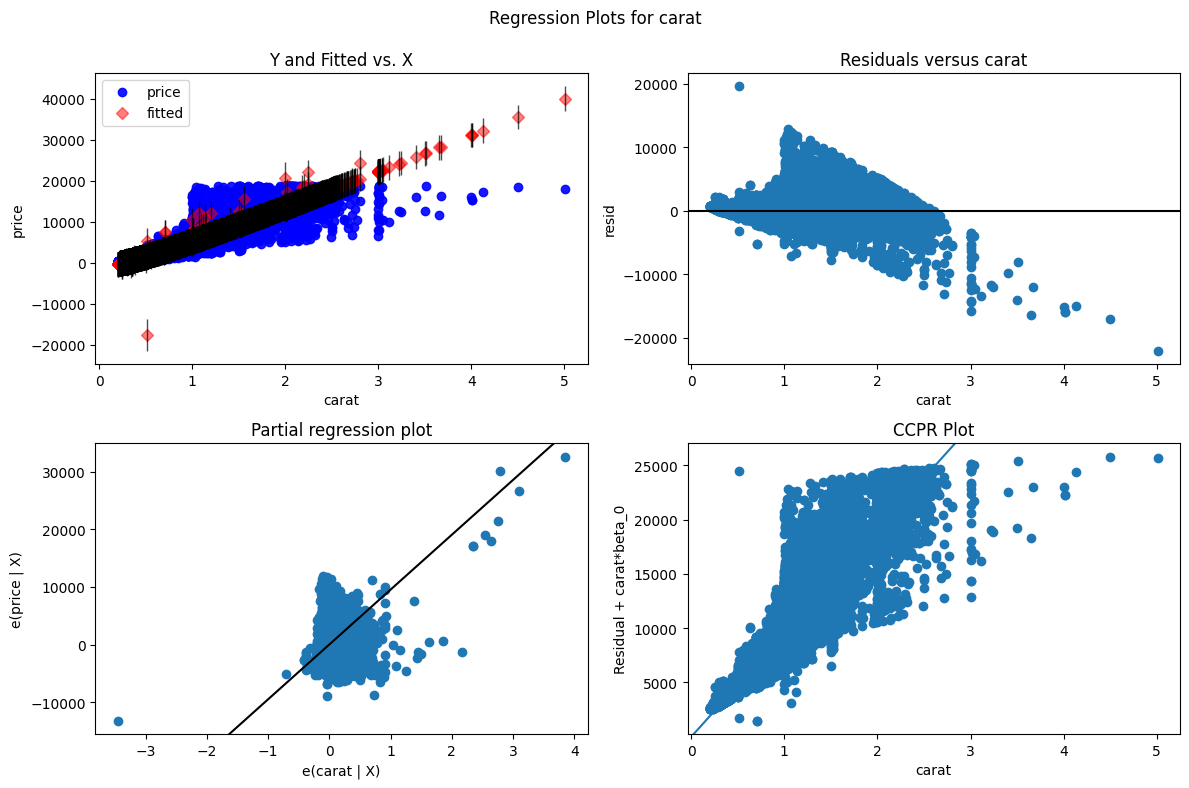

In [ ]:
#checking resideual for caret variable
sm.graphics.plot_regress_exog(result, "carat", fig=plt.figure(figsize=(12,8)));

### Checking distribution of the target

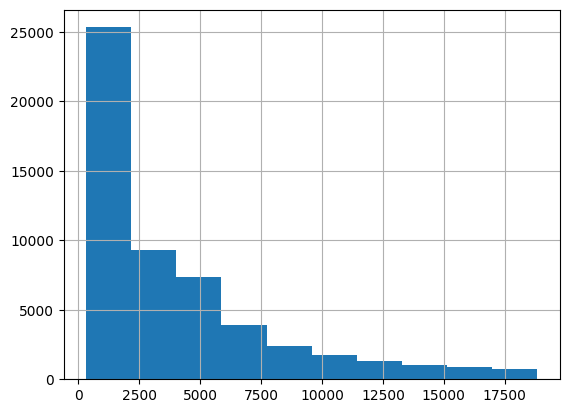

In [ ]:
#target variable distribution
y.hist();

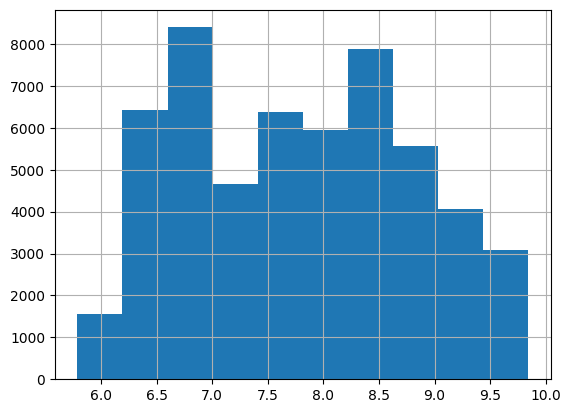

In [ ]:
#To improve the distribution, we can apply log tranformation
y_scd = np.log(y)
y_scd.hist();

In [ ]:
y_scd

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price, Length: 53940, dtype: float64

In [ ]:
data_df2.price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
np.exp(y_scd)

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53940, dtype: float64

In [ ]:
#model with transformed target(log_scaled target)
model2 = sm.OLS(y_scd, X)
result2 =model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.072e+06
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        17:44:53   Log-Likelihood:                         -7833.4
No. Observations:               53940   AIC:                                  1.568e+04
Df Residuals:                   53934   BIC:                                  1.573e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -0.7522      0.011    -69.197      0.000      -0.774      -0.731
depth          0.0319      0.000     72.131      0.000       0.031       0.033
table         -0.0062      0.000    -13.212      0.000      -0.007      -0.005
x              1.1098      0.007    150.072      0.000       1.095       1.124
y              0.0506      0.005     10.660      0.000       0.041       0.060
z              0.0340      0.008      4.377      0.000       0.019       0.049
==============================================================================
Omnibus:                    50951.621   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28055158.482
Skew:                           3.704   Prob(JB):                         0.00
Kurtosis:                     114.481   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


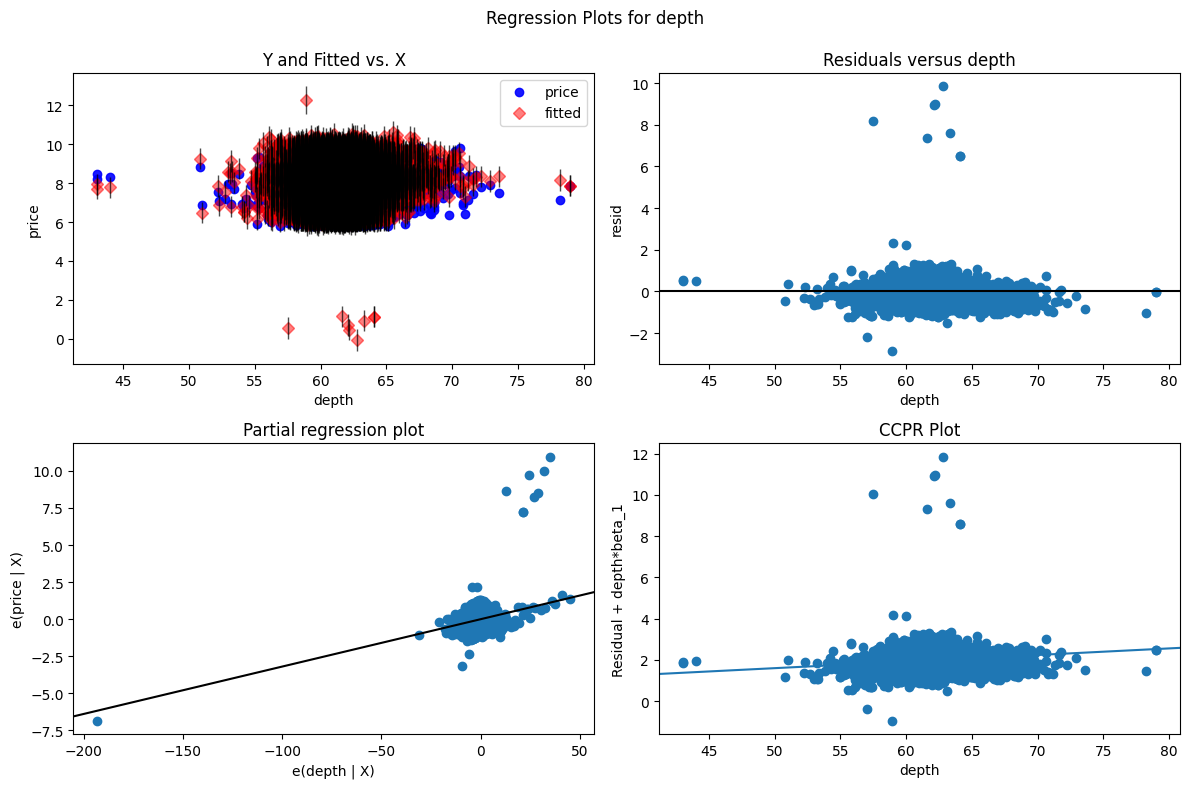

In [ ]:
#checking residual
sm.graphics.plot_regress_exog(result2, "depth", fig=plt.figure(figsize=(12,8)));

### remember r squared can be -ve

In [ ]:
bad_pred = np.mean(y)+ np.ones(len(y))# 0
worse_pred = (np.mean(y)*1000)+ np.ones(len(y))#.. very large.

print(metrics.r2_score(y, bad_pred))
print(metrics.r2_score(y, worse_pred))

-6.28324843265915e-08
-969882.4290063309


#challange: use the mpg dataset from searborn to practise on what we have covered.